In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_context("talk")
sns.set_style("whitegrid")
%matplotlib inline

In [6]:
def label_point(x, y, val, ax, x_offset=0.02, y_offset=0):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+x_offset, point['y']+y_offset, str(point['val']))

        
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    return plt.cm.get_cmap(base_cmap, N)

In [7]:
df = pd.read_csv("endpoints_07-08.csv")

foob = pd.read_csv("catch_summary.csv")
df = df.merge(foob[["catchment","pop"]], how="left", left_on="catch", right_on="catchment")

df["cases"] = df["cases"]/df["pop"]
df = df[df["catch"] != "siavonga"]

df["itn_pretrial"] = False
df["itn_trial"] = False
df.loc[np.logical_and(df["itn"], df["itn_type"]=="pretrial_only"),"itn_pretrial"] = True
df.loc[np.logical_and(df["itn"], df["itn_type"]=="pretrial_only"),"itn_trial"] = False

df.loc[np.logical_and(df["itn"], df["itn_type"]=="all_years"),"itn_pretrial"] = True
df.loc[np.logical_and(df["itn"], df["itn_type"]=="all_years"),"itn_trial"] = True


df["int_flag_sum"] = df["chw_hs"].astype(int) + df["itn"].astype(int) + df["irs"].astype(int) + df["mda"].astype(int) + df["rcd"].astype(int)
df["cf_type"] = "subtr"
df["cf_var"] = "None"

df.loc[df["int_flag_sum"] == 0,"cf_type"] = "no_interventions"
df.loc[df["int_flag_sum"] == 1,"cf_type"] = "add"
df.loc[np.logical_and(df["int_flag_sum"] == 1, df["itn_type"]=="pretrial_only"),"cf_var"] = "itn_pretrial"
df.loc[np.logical_and(df["int_flag_sum"] == 1, df["itn_type"]=="all_years"),"cf_var"] = "itn_all_years"

df.loc[np.logical_and(df["int_flag_sum"] == 5, df["itn_type"]=="all_years"),"cf_type"] = "all_interventions"

df.loc[np.logical_and(df["int_flag_sum"] == 5, df["itn_type"]=="pretrial_only"),"cf_type"] = "subtr"
df.loc[np.logical_and(df["int_flag_sum"] == 5, df["itn_type"]=="pretrial_only"),"cf_var"] = "itn_trial"

df.loc[np.logical_and(df["int_flag_sum"] == 4, np.logical_not(df["itn"])),"cf_type"] = "subtr"
df.loc[np.logical_and(df["int_flag_sum"] == 4, np.logical_not(df["itn"])),"cf_var"] = "itn_all_years"

int_list = ["itn","irs","mda","rcd","chw_hs"]
for v in int_list:
    if v != "itn":
        df.loc[np.logical_and(df["cf_type"]=="add", df[v]),"cf_var"] = v
        df.loc[np.logical_and(df["cf_type"]=="subtr", np.logical_not(df[v])),"cf_var"] = v
#     else:
#         for w in ["all_years", "pretrial_only"]:
#             df.loc[np.logical_and(
#                 np.logical_and(df["cf_type"]=="add", df[v]),
#                 df["itn_type"]==w),"cf_var"] = "itn_{}".format(w)
#             df.loc[np.logical_and(
#                 np.logical_and(df["cf_type"]=="subtr", np.logical_not(df[v])),
#                 df["itn_type"]==w), "cf_var"] = "itn_{}".format(w)

Text(0, 0.5, 'Average annual RDT prevalence')

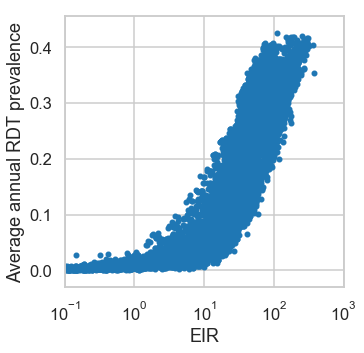

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(df["EIR"],df["avg_RDT_prev"],marker='.')
plt.xscale('log')
plt.xlim([0.1,1000])
plt.xlabel("EIR")
plt.ylabel("Average annual RDT prevalence")

In [9]:
all_int = df[df["cf_type"]=="all_interventions"].groupby(['catch']).agg("median")
all_int.reset_index(inplace=True)
all_int

,catch,EIR,RDT_prev,Run_Number,arab,avg_RDT_prev,cases,chw_hs,funest,irs,itn,mda,rcd,sample,true_prev,pop,itn_pretrial,itn_trial,int_flag_sum
0,chiyabi,60.331855,0.133988,2,10.10,0.181278,0.634916,True,9.178571,True,True,True,True,179,0.106679,4803,True,True,5
1,dimbwe,0.867748,0.015906,2,9.25,0.008293,0.042986,True,9.680000,True,True,True,True,193,0.013099,4327,True,True,5
2,harmony,0.144057,0.005425,2,10.02,0.003853,0.011231,True,9.120000,True,True,True,True,142,0.004692,4986,True,True,5
3,jamba,10.267926,0.169192,2,10.02,0.053184,0.306470,True,8.280000,True,True,True,True,46,0.145743,2643,True,True,5
4,jembo,0.559440,0.004097,2,9.69,0.002316,0.010724,True,9.120000,True,True,True,True,137,0.003513,9138,True,True,5
5,kasikili,1.323115,0.011714,2,10.13,0.017978,0.076171,True,8.280000,True,True,True,True,47,0.008842,3479,True,True,5
6,luumbo,20.033506,0.176901,2,10.00,0.101930,0.467567,True,8.321429,True,True,True,True,59,0.153799,9327,True,True,5
7,maamba,6.459015,0.014535,2,9.25,0.012834,0.049973,True,9.120000,True,True,True,True,129,0.011967,11126,True,True,5
8,masempela,2.112342,0.025995,2,9.14,0.022059,0.087802,True,9.400000,True,True,True,True,161,0.021883,6788,True,True,5
9,masuku mines,6.849573,0.021164,2,9.91,0.012532,0.052097,True,10.100000,True,True,True,True,241,0.018512,2956,True,True,5


In [10]:
no_int = df[df["cf_type"]=="no_interventions"].groupby(['catch']).agg("median")
no_int.reset_index(inplace=True)
no_int

,catch,EIR,RDT_prev,Run_Number,arab,avg_RDT_prev,cases,chw_hs,funest,irs,itn,mda,rcd,sample,true_prev,pop,itn_pretrial,itn_trial,int_flag_sum
0,chiyabi,186.405918,0.383304,2,10.10,0.381885,1.470747,False,9.178571,False,False,False,False,179,0.318735,4803,False,False,0
1,dimbwe,81.500319,0.383791,2,9.25,0.356868,1.588167,False,9.680000,False,False,False,False,193,0.325276,4327,False,False,0
2,harmony,38.263658,0.392658,2,10.02,0.293867,1.443442,False,9.120000,False,False,False,False,142,0.340261,4986,False,False,0
3,jamba,98.129019,0.398289,2,10.02,0.327659,1.361332,False,8.280000,False,False,False,False,46,0.340195,2643,False,False,0
4,jembo,61.192419,0.397420,2,9.69,0.339661,1.439921,False,9.120000,False,False,False,False,137,0.340028,9138,False,False,0
5,kasikili,53.101366,0.439557,2,10.13,0.309534,1.374245,False,8.280000,False,False,False,False,47,0.388968,3479,False,False,0
6,luumbo,107.407011,0.412380,2,10.00,0.340833,1.300579,False,8.321429,False,False,False,False,59,0.351402,9327,False,False,0
7,maamba,74.985222,0.370660,2,9.25,0.350496,1.600485,False,9.120000,False,False,False,False,129,0.309986,11126,False,False,0
8,masempela,62.554076,0.402948,2,9.14,0.366254,1.497938,False,9.400000,False,False,False,False,161,0.346303,6788,False,False,0
9,masuku mines,199.691744,0.374958,2,9.91,0.369573,1.635656,False,10.100000,False,False,False,False,241,0.310287,2956,False,False,0


In [11]:
all_int.rename(columns={"EIR": "all_int_EIR",
                       "avg_RDT_prev": "all_int_avg_RDT_prev",
                       "cases": "all_int_cases"},
              inplace=True)

no_int.rename(columns={"EIR": "no_int_EIR",
                       "avg_RDT_prev": "no_int_avg_RDT_prev",
                       "cases": "no_int_cases"},
              inplace=True)
x = all_int[["catch","all_int_EIR","all_int_avg_RDT_prev","all_int_cases"]].merge(no_int[["catch","no_int_EIR","no_int_avg_RDT_prev","no_int_cases"]], on="catch")

for v in ["EIR","avg_RDT_prev","cases"]:
    x["total_drop_{}".format(v)] = x["no_int_{}".format(v)]-x["all_int_{}".format(v)]

Text(0, 0.5, 'EIR post-intervention')

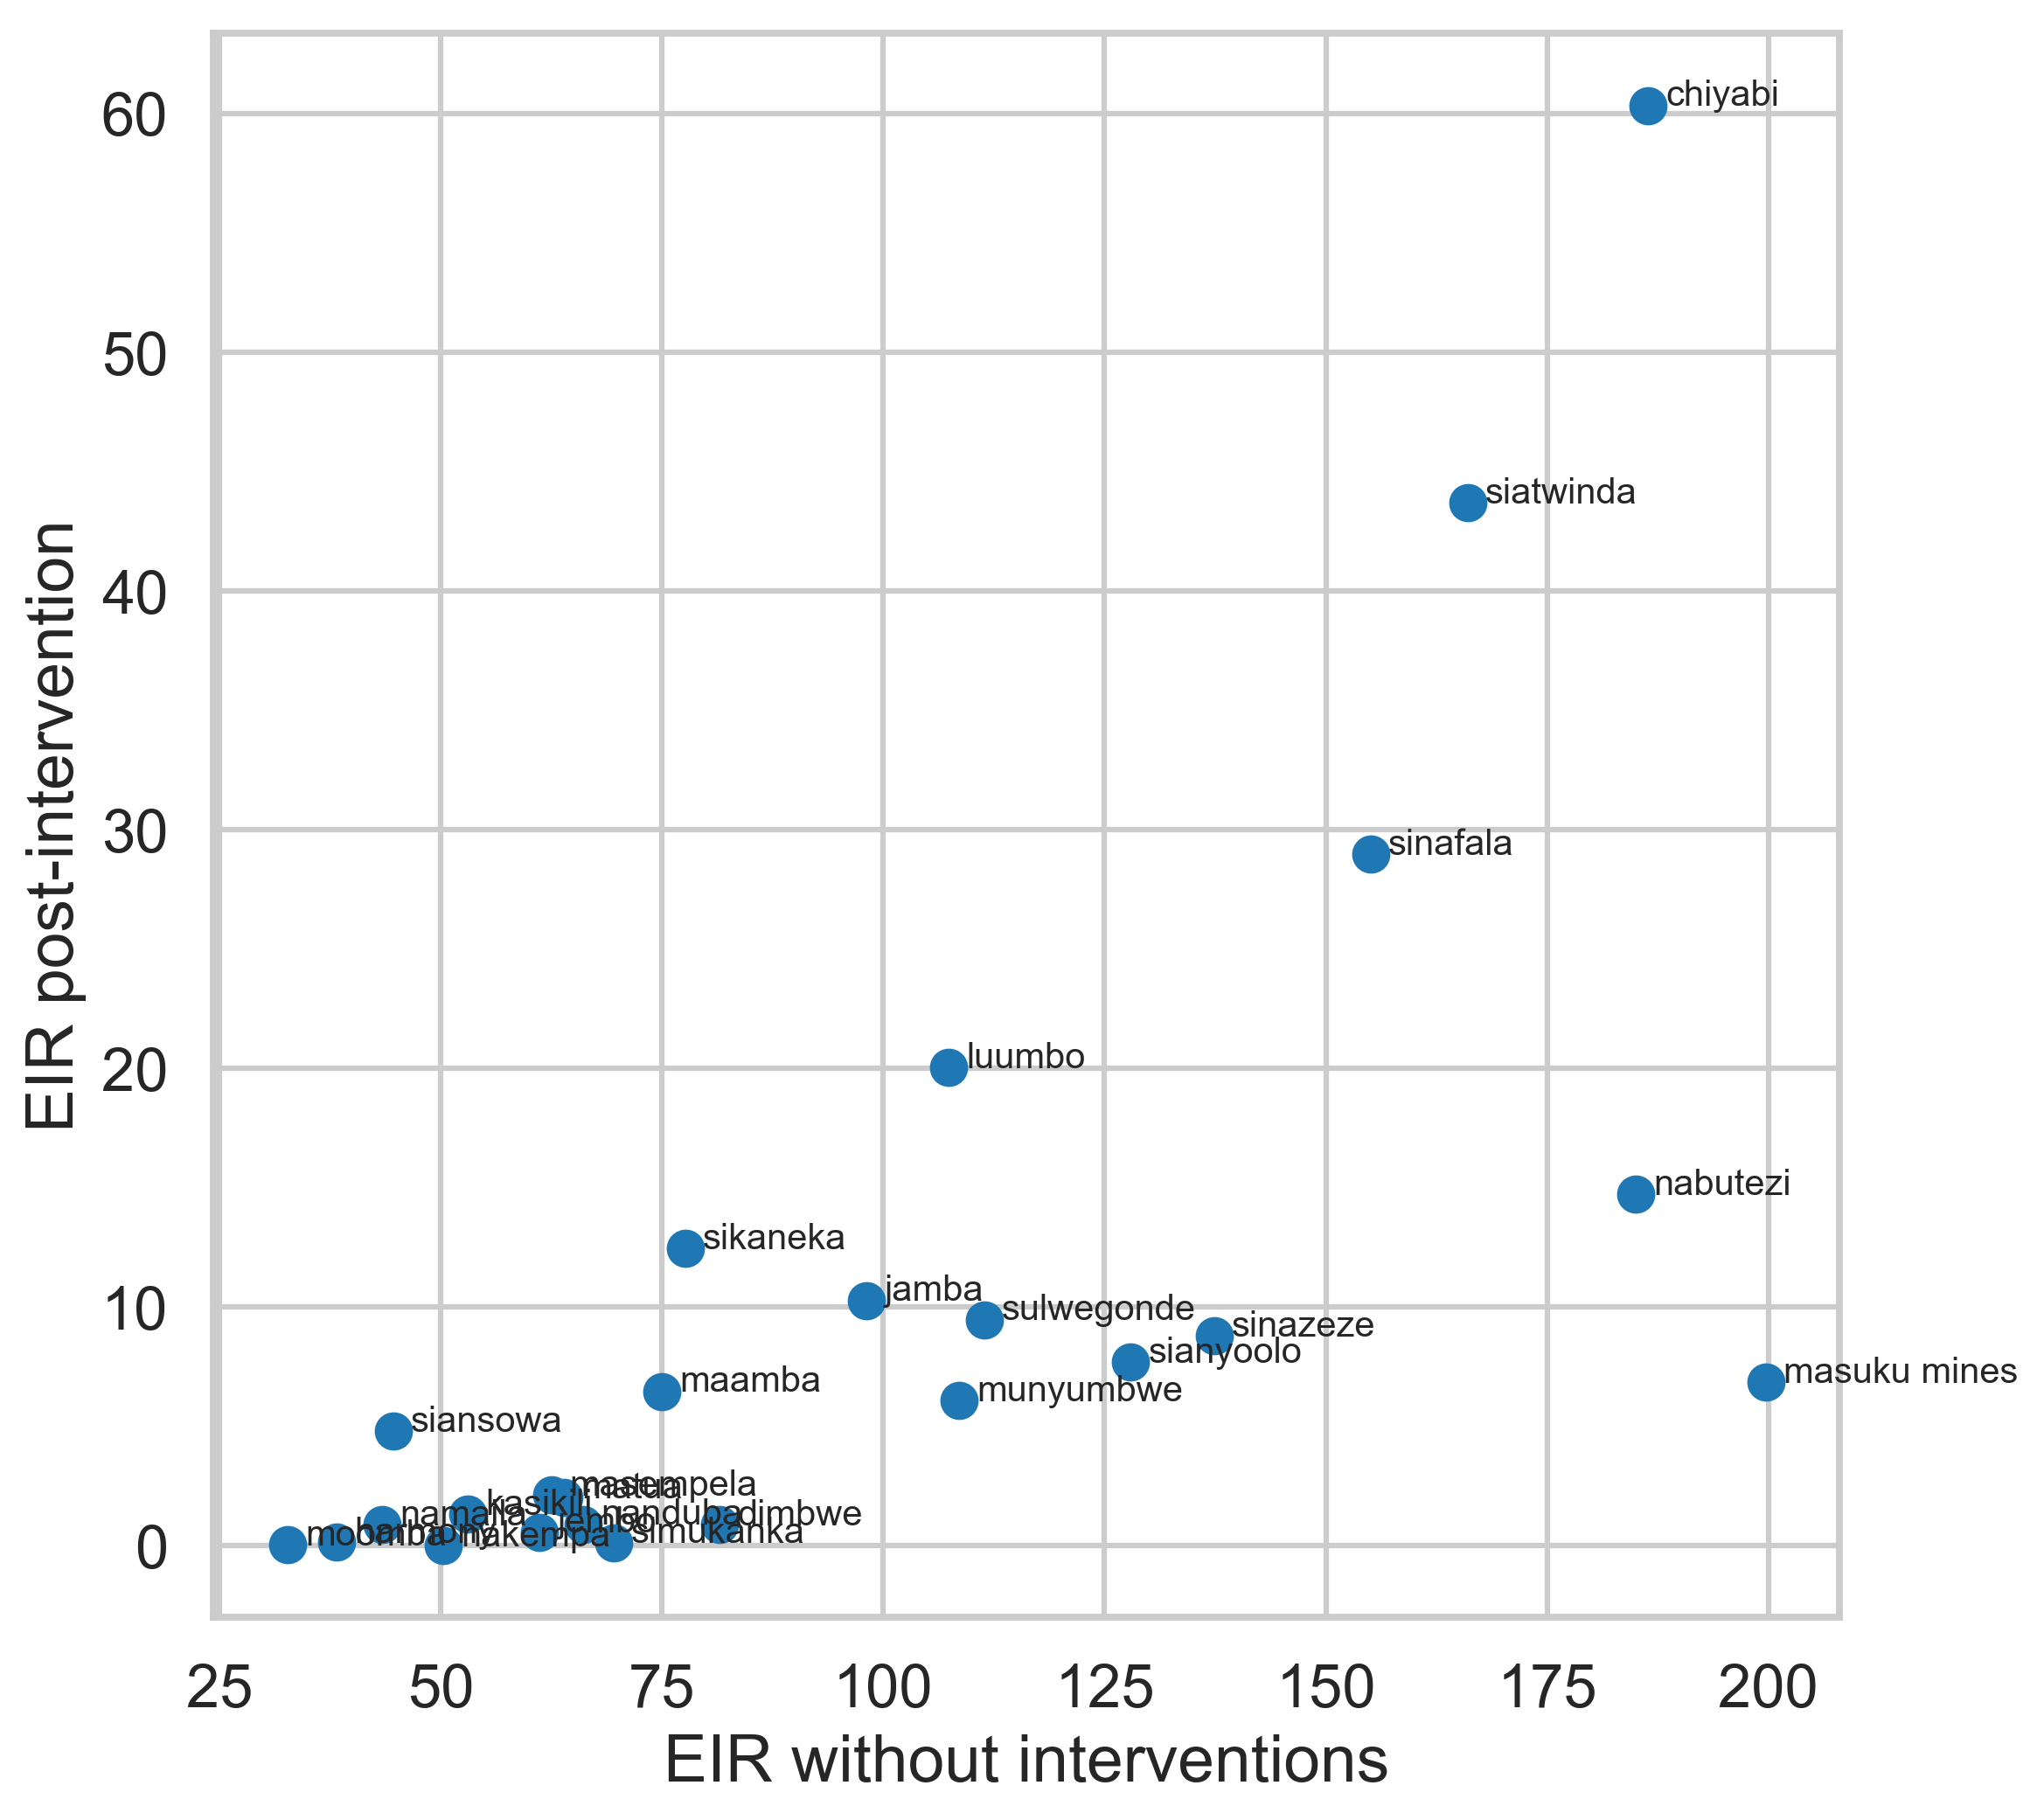

In [12]:
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111)
plt.scatter(x["no_int_EIR"], x["all_int_EIR"])
# plt.xscale('log')
# plt.xlim([10,300])

#plt.yscale('log')
label_point(x["no_int_EIR"], x["all_int_EIR"], x["catch"],ax=ax, x_offset=2)
plt.xlabel("EIR without interventions")
plt.ylabel("EIR post-intervention")

In [13]:
df.columns

Index(['EIR', 'RDT_prev', 'Run_Number', 'arab', 'avg_RDT_prev', 'cases',
       'catch', 'chw_hs', 'dll_collection_id', 'exe_collection_id', 'funest',
       'input_collection_id', 'irs', 'itn', 'itn_type', 'mda', 'rcd', 'sample',
       'true_prev', 'catchment', 'pop', 'itn_pretrial', 'itn_trial',
       'int_flag_sum', 'cf_type', 'cf_var'],
      dtype='object')

In [14]:
foo = df.groupby(['catch','sample',"cf_type","cf_var","Run_Number"]).agg("median")
# foo = df.groupby(['catch','sample',"cf_type","cf_var"]).agg("median")
foo.reset_index(inplace=True)

# additive
a = foo[foo["cf_type"]=="add"].copy(deep=True)
all_int = foo[foo["cf_type"]=="all_interventions"].copy(deep=True)
s = foo[foo["cf_type"]=="subtr"].copy(deep=True)
no_int = foo[foo["cf_type"]=="no_interventions"].copy(deep=True)

all_int.rename(columns={"EIR": "all_int_EIR",
                       "avg_RDT_prev": "all_int_avg_RDT_prev",
                       "cases": "all_int_cases"},
              inplace=True)
no_int.rename(columns={"EIR": "no_int_EIR",
                       "avg_RDT_prev": "no_int_avg_RDT_prev",
                       "cases": "no_int_cases"},
              inplace=True)
all_int = all_int.merge(no_int[["catch","sample","no_int_EIR","no_int_avg_RDT_prev","no_int_cases"]], on=["catch","sample"])
for v in ["EIR","cases","avg_RDT_prev"]:
    all_int["total_drop_{}".format(v)] = all_int["no_int_{}".format(v)]-all_int["all_int_{}".format(v)]

a = a.merge(no_int[["catch","sample","no_int_EIR","no_int_avg_RDT_prev","no_int_cases"]],on=["catch","sample"])
s = s.merge(all_int[["catch","sample","all_int_EIR","all_int_avg_RDT_prev","all_int_cases","total_drop_EIR","total_drop_avg_RDT_prev","total_drop_cases"]],on=["catch","sample"])
s = s.merge(no_int[["catch","sample","no_int_EIR","no_int_avg_RDT_prev","no_int_cases"]],on=["catch","sample"])

for v in ["EIR","cases","avg_RDT_prev"]:
    a["d_{}".format(v)] = a["no_int_{}".format(v)] - a[v]
    a["rel_d_{}".format(v)] = a["d_{}".format(v)]/a["no_int_{}".format(v)]
    s["d_{}".format(v)] = s[v] - s["all_int_{}".format(v)]
    s["rel_d_{}".format(v)] = s["d_{}".format(v)]/s["total_drop_{}".format(v)]
    

Text(0.5, 1.0, 'Subtractive')

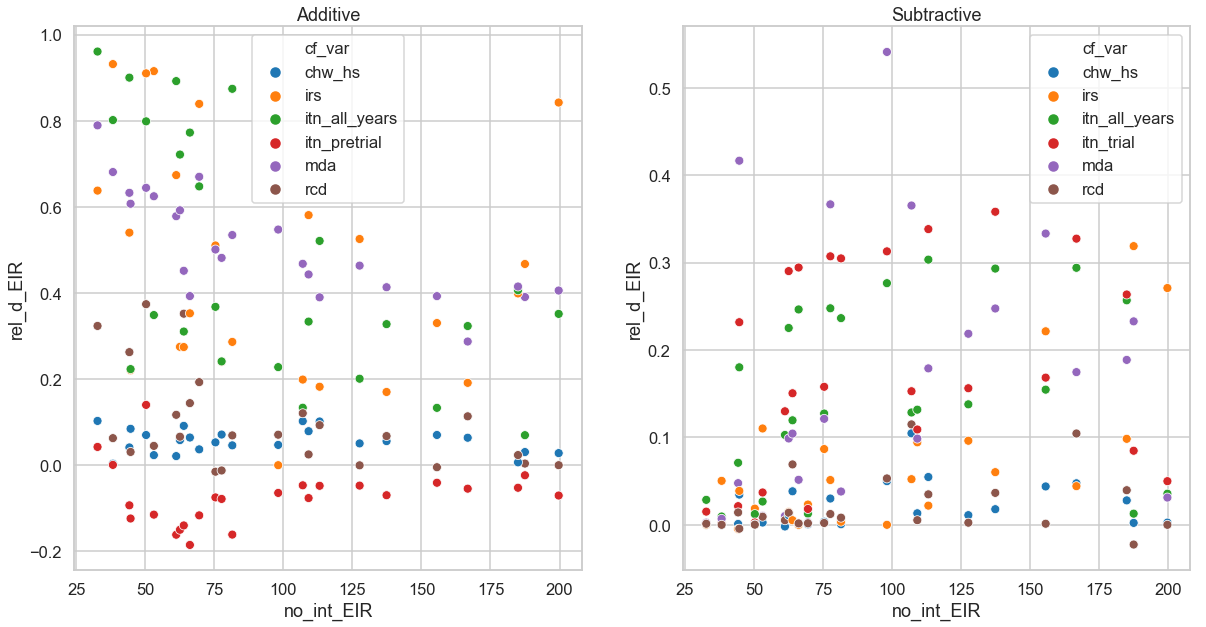

In [15]:
# Visualizing subtractive versus additive counterfactuals
plt.figure(figsize=(20,10))
plt.subplot(121)
foo = a.groupby(["catch","cf_var"]).agg("median").reset_index()
sns.scatterplot("no_int_EIR","rel_d_EIR",data=foo, hue="cf_var")
plt.title("Additive")

plt.subplot(122)
bar= s.groupby(["catch","cf_var"]).agg("median").reset_index()
sns.scatterplot("no_int_EIR","rel_d_EIR",data=bar, hue="cf_var")
plt.title("Subtractive")

In [16]:
num_days = 2*365+7*30

cov_df = pd.read_csv("catch_coverages_2014_onwards.csv")
my_catch_list = list(set(df["catch"]))

cov_df = cov_df[np.in1d(cov_df["catch"], my_catch_list)]
cov_df.reset_index(inplace=True, drop=True)

chw_df = pd.read_csv("../slide_prep/chw_cov.csv")
cov_df = cov_df.merge(chw_df, how="left", on="catch")



cov_df["mda_metric_1"] = np.sqrt(cov_df["mda_med_cov"]*cov_df["mda_max_cov"])
cov_df["mda_metric_2"] = np.sqrt(cov_df["mda_total_cov"]*cov_df["mda_max_cov"])
cov_df["mda_bin"] = "none"
MDA_thresh = np.median(cov_df["mda_metric_1"])
cov_df.loc[cov_df["mda_metric_1"] < MDA_thresh, "mda_bin"] = "low"
cov_df.loc[cov_df["mda_metric_1"] >= MDA_thresh, "mda_bin"] = "high"


cov_df["itn_bin"] = "none"
ITN_thresh = np.median(cov_df["itn_integrated_cov"])
cov_df.loc[cov_df["itn_integrated_cov"] < ITN_thresh, "itn_bin"] = "low"
cov_df.loc[cov_df["itn_integrated_cov"] >= ITN_thresh, "itn_bin"] = "high"

cov_df["irs_bin"] = "none"
# some_IRS = cov_df["irs_max_kill"] >= 0.15
some_IRS = cov_df["irs_integrated_cov"] >= 140
IRS_thresh1 = 140
# IRS_thresh = np.median(cov_df["irs_integrated_cov"][some_IRS])
IRS_thresh2 = 560 # derived visually
cov_df.loc[np.logical_and(cov_df["irs_integrated_cov"] < IRS_thresh2, some_IRS), "irs_bin"] = "low"
cov_df.loc[cov_df["irs_integrated_cov"] >= IRS_thresh2, "irs_bin"] = "high"

cov_df["vc_bin"] = 0
cov_df.loc[np.logical_and(cov_df["itn_bin"] == "low", cov_df["irs_bin"] == "none"), "vc_bin"] = 0

cov_df.loc[np.logical_and(cov_df["itn_bin"] == "high", cov_df["irs_bin"] == "none"), "vc_bin"] = 1
cov_df.loc[np.logical_and(cov_df["itn_bin"] == "low", cov_df["irs_bin"] == "low"), "vc_bin"] = 1

cov_df.loc[np.logical_and(cov_df["itn_bin"] == "high", cov_df["irs_bin"] == "low"), "vc_bin"] = 2
cov_df.loc[np.logical_and(cov_df["itn_bin"] == "low", cov_df["irs_bin"] == "high"), "vc_bin"] = 2

cov_df.loc[np.logical_and(cov_df["itn_bin"] == "high", cov_df["irs_bin"] == "high"), "vc_bin"] = 3

def rescale_cov(v):
    # want mx+b such that min(v) -->0, and max(v) --> 1
    v0 = np.min(v)
    v1 = np.max(v)
    m = 1/(v1-v0)
    b = -m*v0
    return m*v+b
    
cov_df["irs_score"] = rescale_cov(cov_df["irs_max_kill"]/0.9)
cov_df["itn_score"] = rescale_cov(cov_df["itn_integrated_cov"]/num_days)
cov_df["mda_score"] = rescale_cov(cov_df["mda_max_cov"])
cov_df["chw_score"] = rescale_cov(cov_df["diff_youth_effhs"])

cov_df["vc_score"] = cov_df["itn_score"] + cov_df["irs_score"]

In [17]:
a_gr = a.groupby(["catch","cf_var"]).agg("median").reset_index()
a_ul = a.groupby(["catch","cf_var"]).agg(lambda x: np.abs(np.percentile(x,75)-np.median(x))).reset_index()
a_ll = a.groupby(["catch","cf_var"]).agg(lambda x: np.abs(np.percentile(x,25)-np.median(x))).reset_index()

s_gr = s.groupby(["catch","cf_var"]).agg("median").reset_index()
s_ul = s.groupby(["catch","cf_var"]).agg(lambda x: np.abs(np.percentile(x,75)-np.median(x))).reset_index()
s_ll = s.groupby(["catch","cf_var"]).agg(lambda x: np.abs(np.percentile(x,25)-np.median(x))).reset_index()

a_gr = a_gr.merge(cov_df, on="catch", how="left")
s_gr = s_gr.merge(cov_df, on="catch", how="left")

In [18]:
foo = a_gr[a_gr["rel_d_EIR"]>=0.90][["catch","cf_var","rel_d_EIR"]]
print(foo)

itn_only_list = ["moomba","namaila"]
irs_only_list = ["harmony","kasikili","nakempa"]

print(s_gr[np.logical_and(s_gr["rel_d_EIR"]<0.1, np.in1d(s_gr["cf_var"], ["irs","mda"]))][["catch","cf_var","rel_d_EIR"]])

remove_irs_or_mda = ["dimbwe","harmony","jembo","moomba","munyumbwe","nakempa","namaila","nanduba","simukanka"]
remove_mda = ["kasikili","masempela","masuku mines"]
remove_irs = ["luumbo","maamba","matua","nabutezi","siansowa","sianyoolo","siatwinda","sikaneka","sinazeze","sulwegonde"]
# print(s_gr[np.logical_and(s_gr["rel_d_EIR"]<0.05, np.in1d(s_gr["cf_var"], ["itn_all_years","irs","mda"]))][["catch","cf_var","rel_d_EIR"]])


       catch         cf_var  rel_d_EIR
13   harmony            irs   0.931626
31  kasikili            irs   0.915242
68    moomba  itn_all_years   0.960784
85   nakempa            irs   0.910119
92   namaila  itn_all_years   0.900164
            catch cf_var  rel_d_EIR
7          dimbwe    irs   0.003635
10         dimbwe    mda   0.038107
13        harmony    irs   0.050327
16        harmony    mda   0.006829
19          jamba    irs   0.000000
25          jembo    irs   0.008099
28          jembo    mda   0.010168
34       kasikili    mda   0.010277
37         luumbo    irs   0.052218
43         maamba    irs   0.086717
49      masempela    irs   0.014659
52      masempela    mda   0.098809
58   masuku mines    mda   0.031190
61          matua    irs   0.005247
67         moomba    irs   0.000200
70         moomba    mda   0.002451
73      munyumbwe    irs   0.094409
76      munyumbwe    mda   0.098647
79       nabutezi    irs   0.098411
85        nakempa    irs   0.018524
88        

In [25]:
t1

,catch,all_int_EIR,all_int_avg_RDT_prev,all_int_cases,no_int_EIR,no_int_avg_RDT_prev,no_int_cases,total_drop_EIR,total_drop_avg_RDT_prev,total_drop_cases
11,moomba,0.034783,0.000786,0.004977,32.699658,0.255439,1.221632,32.664875,0.254653,1.216656
15,namaila,0.864929,0.007340,0.035933,43.374622,0.315358,1.373826,42.509692,0.308018,1.337893


Text(0, 0.5, 'EIR post-intervention')

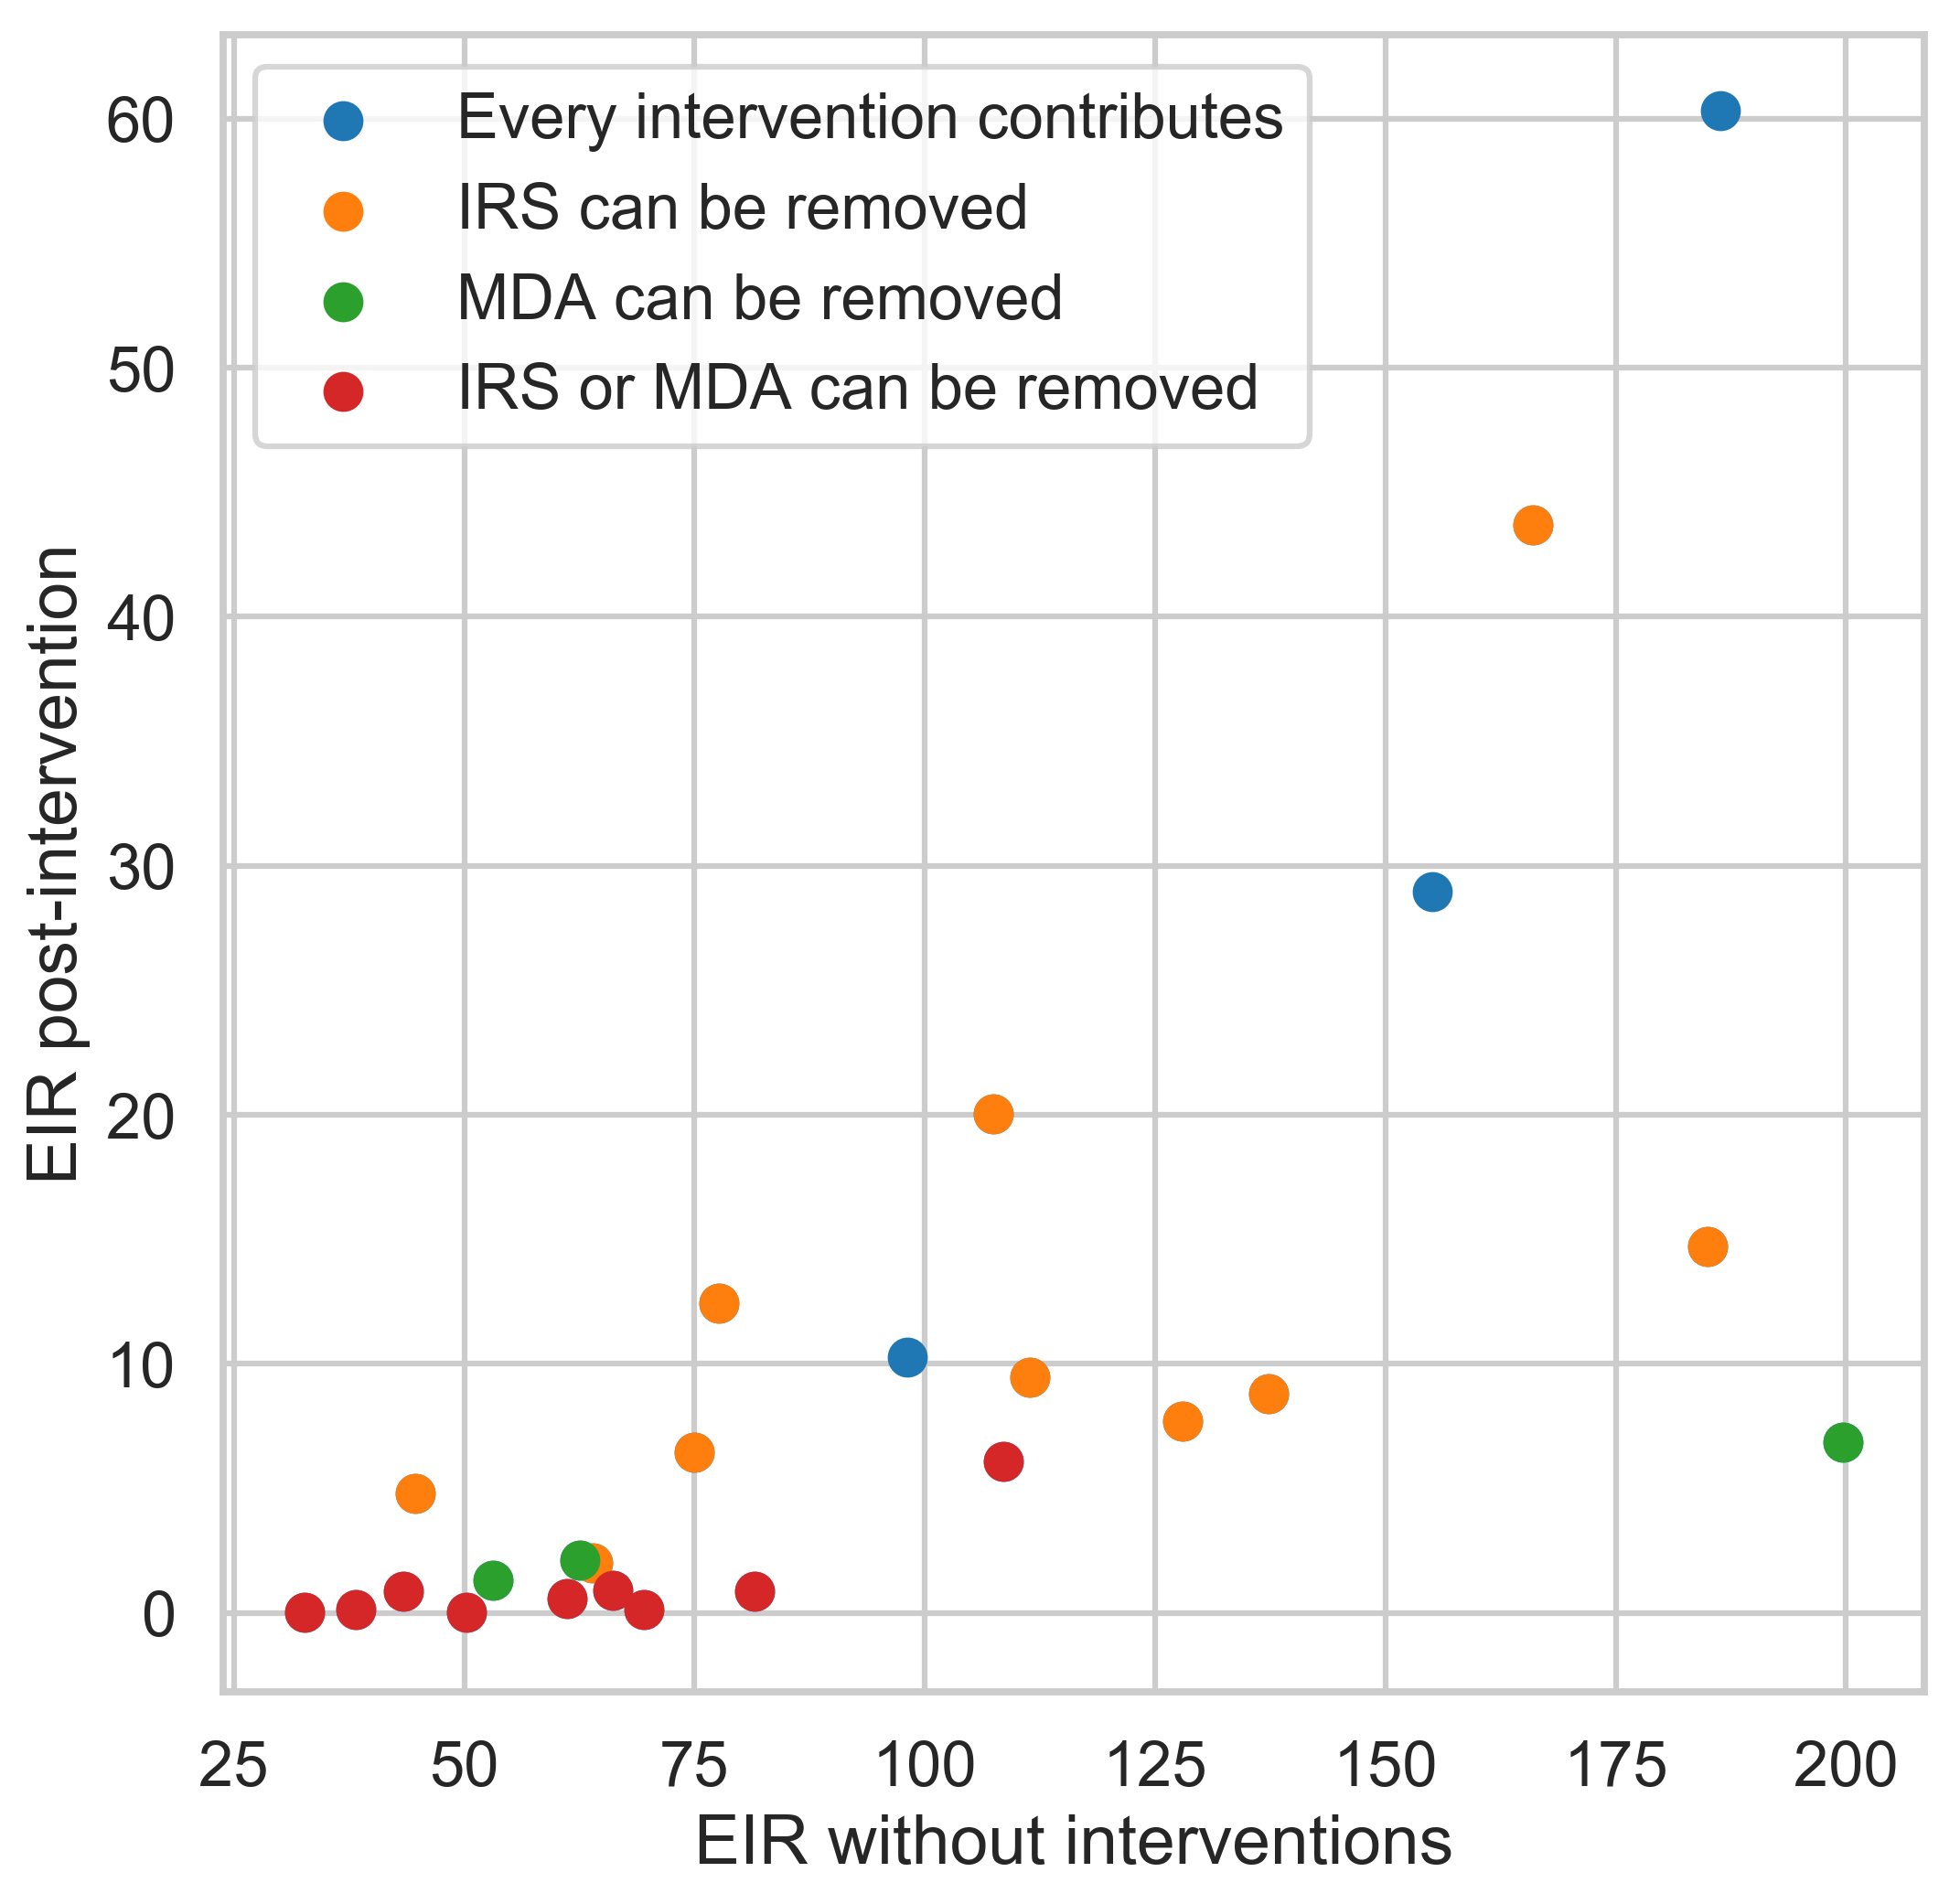

In [48]:
plt.figure(figsize=(8,8),dpi=300)
# ax = plt.subplot(111)

# plt.scatter(x["no_int_EIR"], x["all_int_EIR"],label="No single intervention has >90% impact")

# t1 = x[np.in1d(x["catch"],itn_only_list)]
# plt.scatter(t1["no_int_EIR"], t1["all_int_EIR"],label=">90% impact from ITN alone",zorder=3)

# t1 = x[np.in1d(x["catch"],irs_only_list)]
# plt.scatter(t1["no_int_EIR"], t1["all_int_EIR"],label=">90% impact from IRS alone",zorder=3)

# label_point(x["no_int_EIR"], x["all_int_EIR"], x["catch"],ax=ax, x_offset=2)

# plt.legend()
# plt.xlabel("EIR without interventions")
# plt.ylabel("EIR post-intervention")



plt.scatter(x["no_int_EIR"], x["all_int_EIR"],label="Every intervention contributes")

t1 = x[np.in1d(x["catch"],remove_irs)]
plt.scatter(t1["no_int_EIR"], t1["all_int_EIR"],label="IRS can be removed",zorder=2)

t1 = x[np.in1d(x["catch"],remove_mda)]
plt.scatter(t1["no_int_EIR"], t1["all_int_EIR"],label="MDA can be removed",zorder=2)

t1 = x[np.in1d(x["catch"],remove_irs_or_mda)]
plt.scatter(t1["no_int_EIR"], t1["all_int_EIR"],label="IRS or MDA can be removed",zorder=3)


label_point(x["no_int_EIR"], x["all_int_EIR"], x["catch"],ax=ax, x_offset=2)

plt.legend()
plt.xlabel("EIR without interventions")
plt.ylabel("EIR post-intervention")

# plt.tight_layout()

In [50]:
cov_df["irs_integrated_kill"] = cov_df["irs_integrated_kill"]/num_days
cov_df["itn_integrated_cov_eff"] = cov_df["itn_integrated_cov_eff"]/num_days

In [34]:
cov_df

,catch,irs_integrated_cov,irs_integrated_kill,irs_max_cov,irs_max_kill,itn_integrated_block,itn_integrated_cov,itn_integrated_cov_eff,itn_integrated_kill,itn_max_block,...,mda_metric_2,mda_bin,itn_bin,irs_bin,vc_bin,irs_score,itn_score,mda_score,chw_score,vc_score
0,chiyabi,238.936266,0.109870,0.788753,0.551114,118.602075,248.610998,0.200985,93.765524,0.300935,...,1.235218,high,low,low,1,0.821518,0.020110,0.857627,0.306930,0.841628
1,dimbwe,131.164877,0.049789,0.297393,0.133706,280.251799,561.222522,0.445781,215.015050,0.664078,...,1.119418,low,high,none,1,0.199309,1.000000,0.333889,0.285554,1.199309
2,harmony,446.816426,0.146640,0.810277,0.579208,143.453083,297.144599,0.236659,112.050984,0.402079,...,0.962611,low,low,low,1,0.863397,0.172240,0.894811,0.000000,1.035637
3,jamba,0.000000,0.000000,0.000000,0.000000,190.446964,431.064261,0.336037,153.590457,0.456531,...,1.172286,high,low,none,0,0.000000,0.592015,0.634713,0.726437,0.592015
4,jembo,288.297728,0.124032,0.665291,0.394484,263.442059,542.021699,0.429884,204.536808,0.579021,...,1.092507,high,high,low,2,0.588037,0.939814,0.160841,0.112369,1.527852
5,kasikili,465.706193,0.202485,0.968330,0.584052,131.652800,284.035075,0.226203,104.723706,0.285599,...,0.969447,low,low,low,1,0.870617,0.131148,0.288936,0.115319,1.001766
6,luumbo,62.764092,0.035719,0.300782,0.235224,111.439978,242.195203,0.190983,88.668138,0.252132,...,1.008641,low,low,none,0,0.350636,0.000000,0.074757,0.905632,0.350636
7,maamba,530.038087,0.187371,0.801234,0.433522,233.500325,507.422507,0.397905,185.056537,0.525080,...,1.259822,high,high,low,2,0.646230,0.831362,1.000000,0.178573,1.477592
8,masempela,109.144940,0.050848,0.347972,0.243563,221.079200,462.789113,0.366386,173.020598,0.481694,...,1.108628,low,high,none,1,0.363067,0.691458,0.662837,0.295350,1.054525
9,masuku mines,503.281922,0.199384,0.941876,0.610888,240.969310,493.348075,0.390164,186.496484,0.495221,...,1.027417,low,high,low,2,0.910620,0.787246,0.254178,0.276910,1.697865


In [49]:
cf_var = "itn_all_years"
measure = "EIR"
cov_name_dict = {"itn_all_years": "itn_integrated_cov_eff",
              "chw_hs": "diff_youth_effhs",
              "rcd": "post_youth_effhs",
              "mda": "mda_total_cov",
              "irs": "irs_integrated_kill"}

xlabel_dict = {"itn_all_years": "Average daily ITN usage from 2014 to mid 2016",
              "chw_hs": "Difference in health-seeking rate after CHW added",
              "rcd": "Health-seeking rate post-CHW",
              "mda": "MDA coverage summed over rounds",
              "irs": "Total daily IRS killing from 2014 to mid 2016"}

for cf_var in ['chw_hs', 'irs', 'itn_all_years', 'mda', 'rcd']:
    for measure in ["EIR", "cases", "avg_RDT_prev"]:
        plt.figure(figsize=(15,5),dpi=300)

#         plt.suptitle(measure, fontsize=20)
        ax=plt.subplot(131)
        temp = a_gr[a_gr["cf_var"]==cf_var]
        x = temp[cov_name_dict[cf_var]]
        y = temp["rel_d_{}".format(measure)]
        c = np.log10(temp["no_int_{}".format(measure)])
        l = temp["catch"]
        plt.scatter(x,y,c=c, cmap=discrete_cmap(5,"magma"))
        label_point(x,y,l,ax=ax)
        plt.title("Additive")
        plt.xlabel(xlabel_dict[cf_var], fontsize=12)
        plt.ylabel("Fractional reduction from adding just this intervention", fontsize=12)
        plt.ylim([0,0.5])
        plt.colorbar(label="log10[Baseline {}]".format(measure))

        ax = plt.subplot(132)
        temp2 = s_gr[s_gr["cf_var"]==cf_var]
        x = temp2[cov_name_dict[cf_var]]
        y = temp2["rel_d_{}".format(measure)]
        c = np.log10(temp2["no_int_{}".format(measure)])
        l = temp2["catch"]
        plt.scatter(x,y, c=c, cmap=discrete_cmap(5,"magma"))
        label_point(x,y,l,ax=ax)
        plt.title("Subtractive")
        plt.xlabel(xlabel_dict[cf_var], fontsize=12)
        plt.ylabel("Fraction of all-intervention impact lost without this intervention", fontsize=12)
        plt.ylim([0,0.5])
        plt.colorbar(label="log10[Baseline {}]".format(measure))

        ax = plt.subplot(133)
        h1 = temp[["catch","rel_d_{}".format(measure)]].rename(columns={"rel_d_{}".format(measure): "a_es"})
        h2 = temp2[["catch","rel_d_{}".format(measure)]].rename(columns={"rel_d_{}".format(measure): "s_es"})
        h3 = h1.merge(h2, on="catch")
        x = h3["a_es"]
        y = h3["s_es"]
        l = h3["catch"]
        plt.scatter(x,y, color="C3")
        label_point(x,y,l,ax)
        plt.xlabel("Additive counterfactual", fontsize=12)
        plt.ylabel("Subtractive counterfactual", fontsize=12)
        plt.xlim([0,0.5])
        plt.ylim([0,0.5])

        plt.tight_layout()
        plt.savefig("{}_{}_mini.png".format(cf_var,measure))
        plt.close('all')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

Text(0, 0.5, 'Sum of all subtractive cfs')

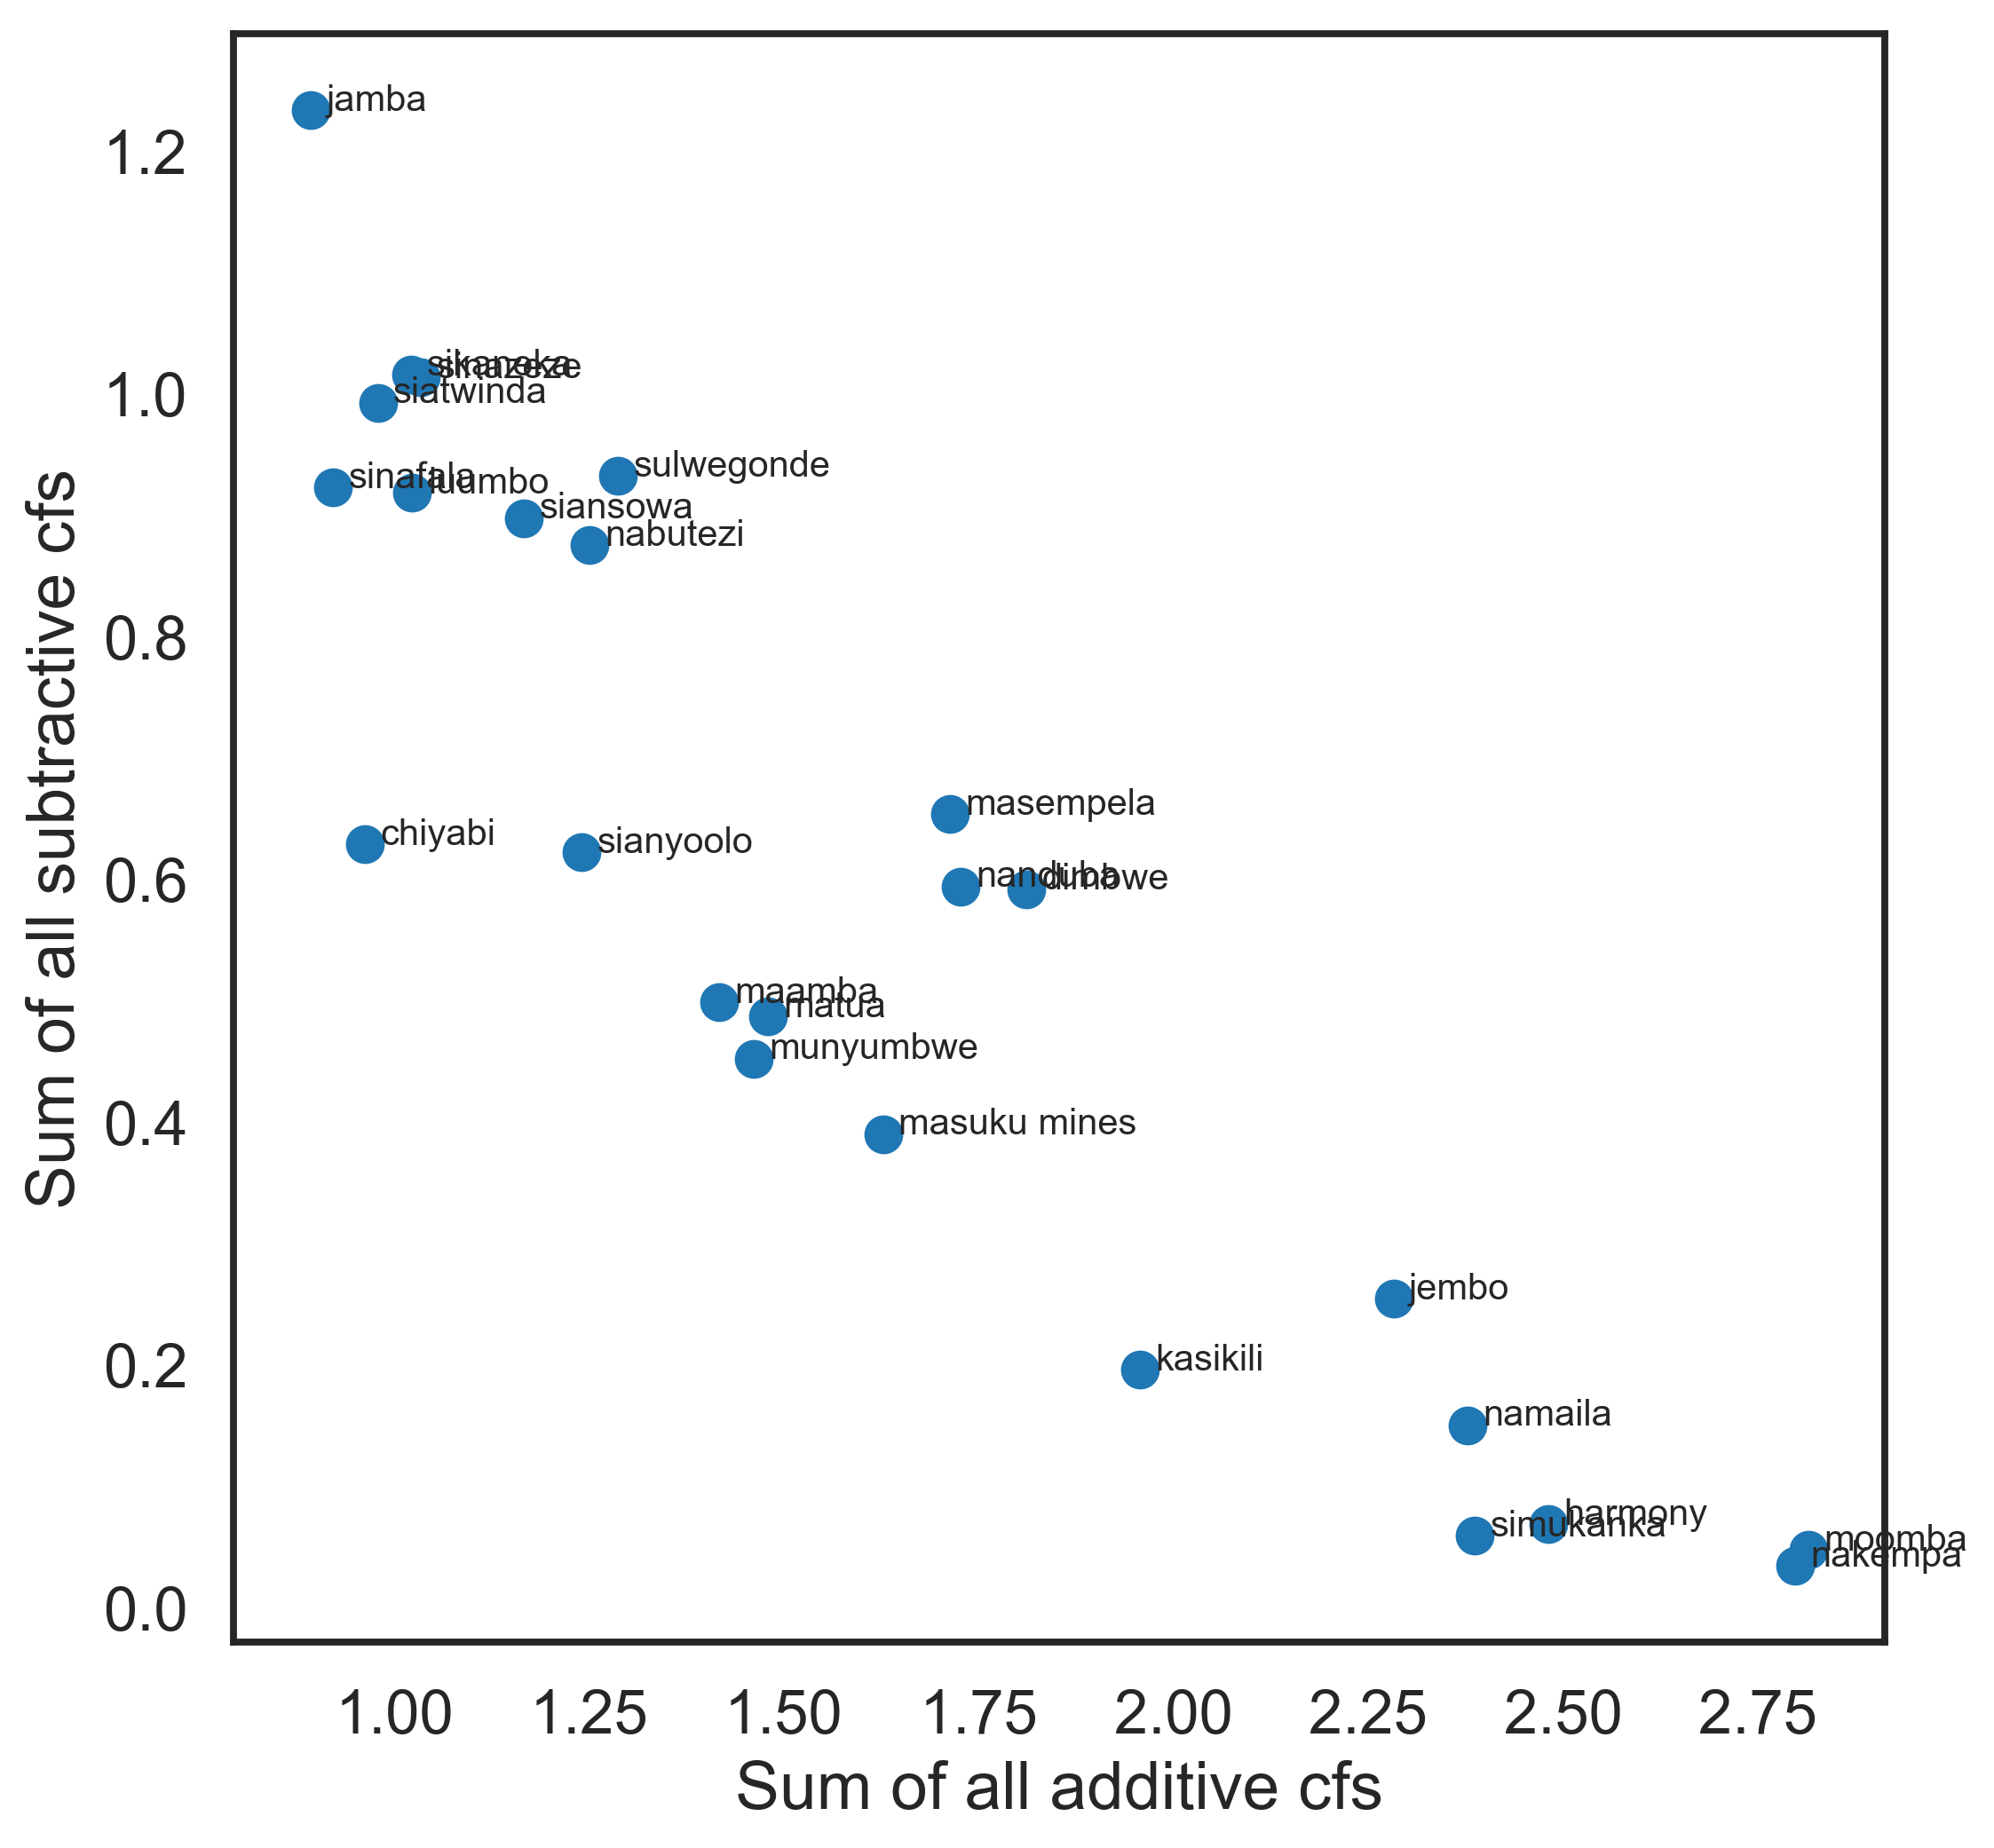

In [240]:
# Compute "overkill" factor and "synergy" factors:

t = a_gr[a_gr["cf_var"] != "itn_pretrial"]
x = t.groupby("catch").agg({"rel_d_EIR": "sum"}).reset_index()
u = s_gr[s_gr["cf_var"] != "itn_pretrial"]
y = u.groupby("catch").agg({"rel_d_EIR": "sum"}).reset_index()

sns.set_style("white")
plt.figure(figsize=(8,8),dpi=300)
ax = plt.subplot(111)
plt.scatter(x["rel_d_EIR"],y["rel_d_EIR"])
label_point(x["rel_d_EIR"],y["rel_d_EIR"],x["catch"],ax)
plt.xlabel("Sum of all additive cfs")
plt.ylabel("Sum of all subtractive cfs")
# plt.show(dpi=300)

In [ ]:
# def additive_stacked_bar():
    

['itn_all_years']
['itn_all_years', 'irs']
['itn_all_years', 'irs', 'mda']
['itn_all_years', 'irs', 'mda', 'chw_hs']
['itn_all_years', 'irs', 'mda', 'chw_hs', 'rcd']


Text(0.5, 0, 'Additive counterfactual')

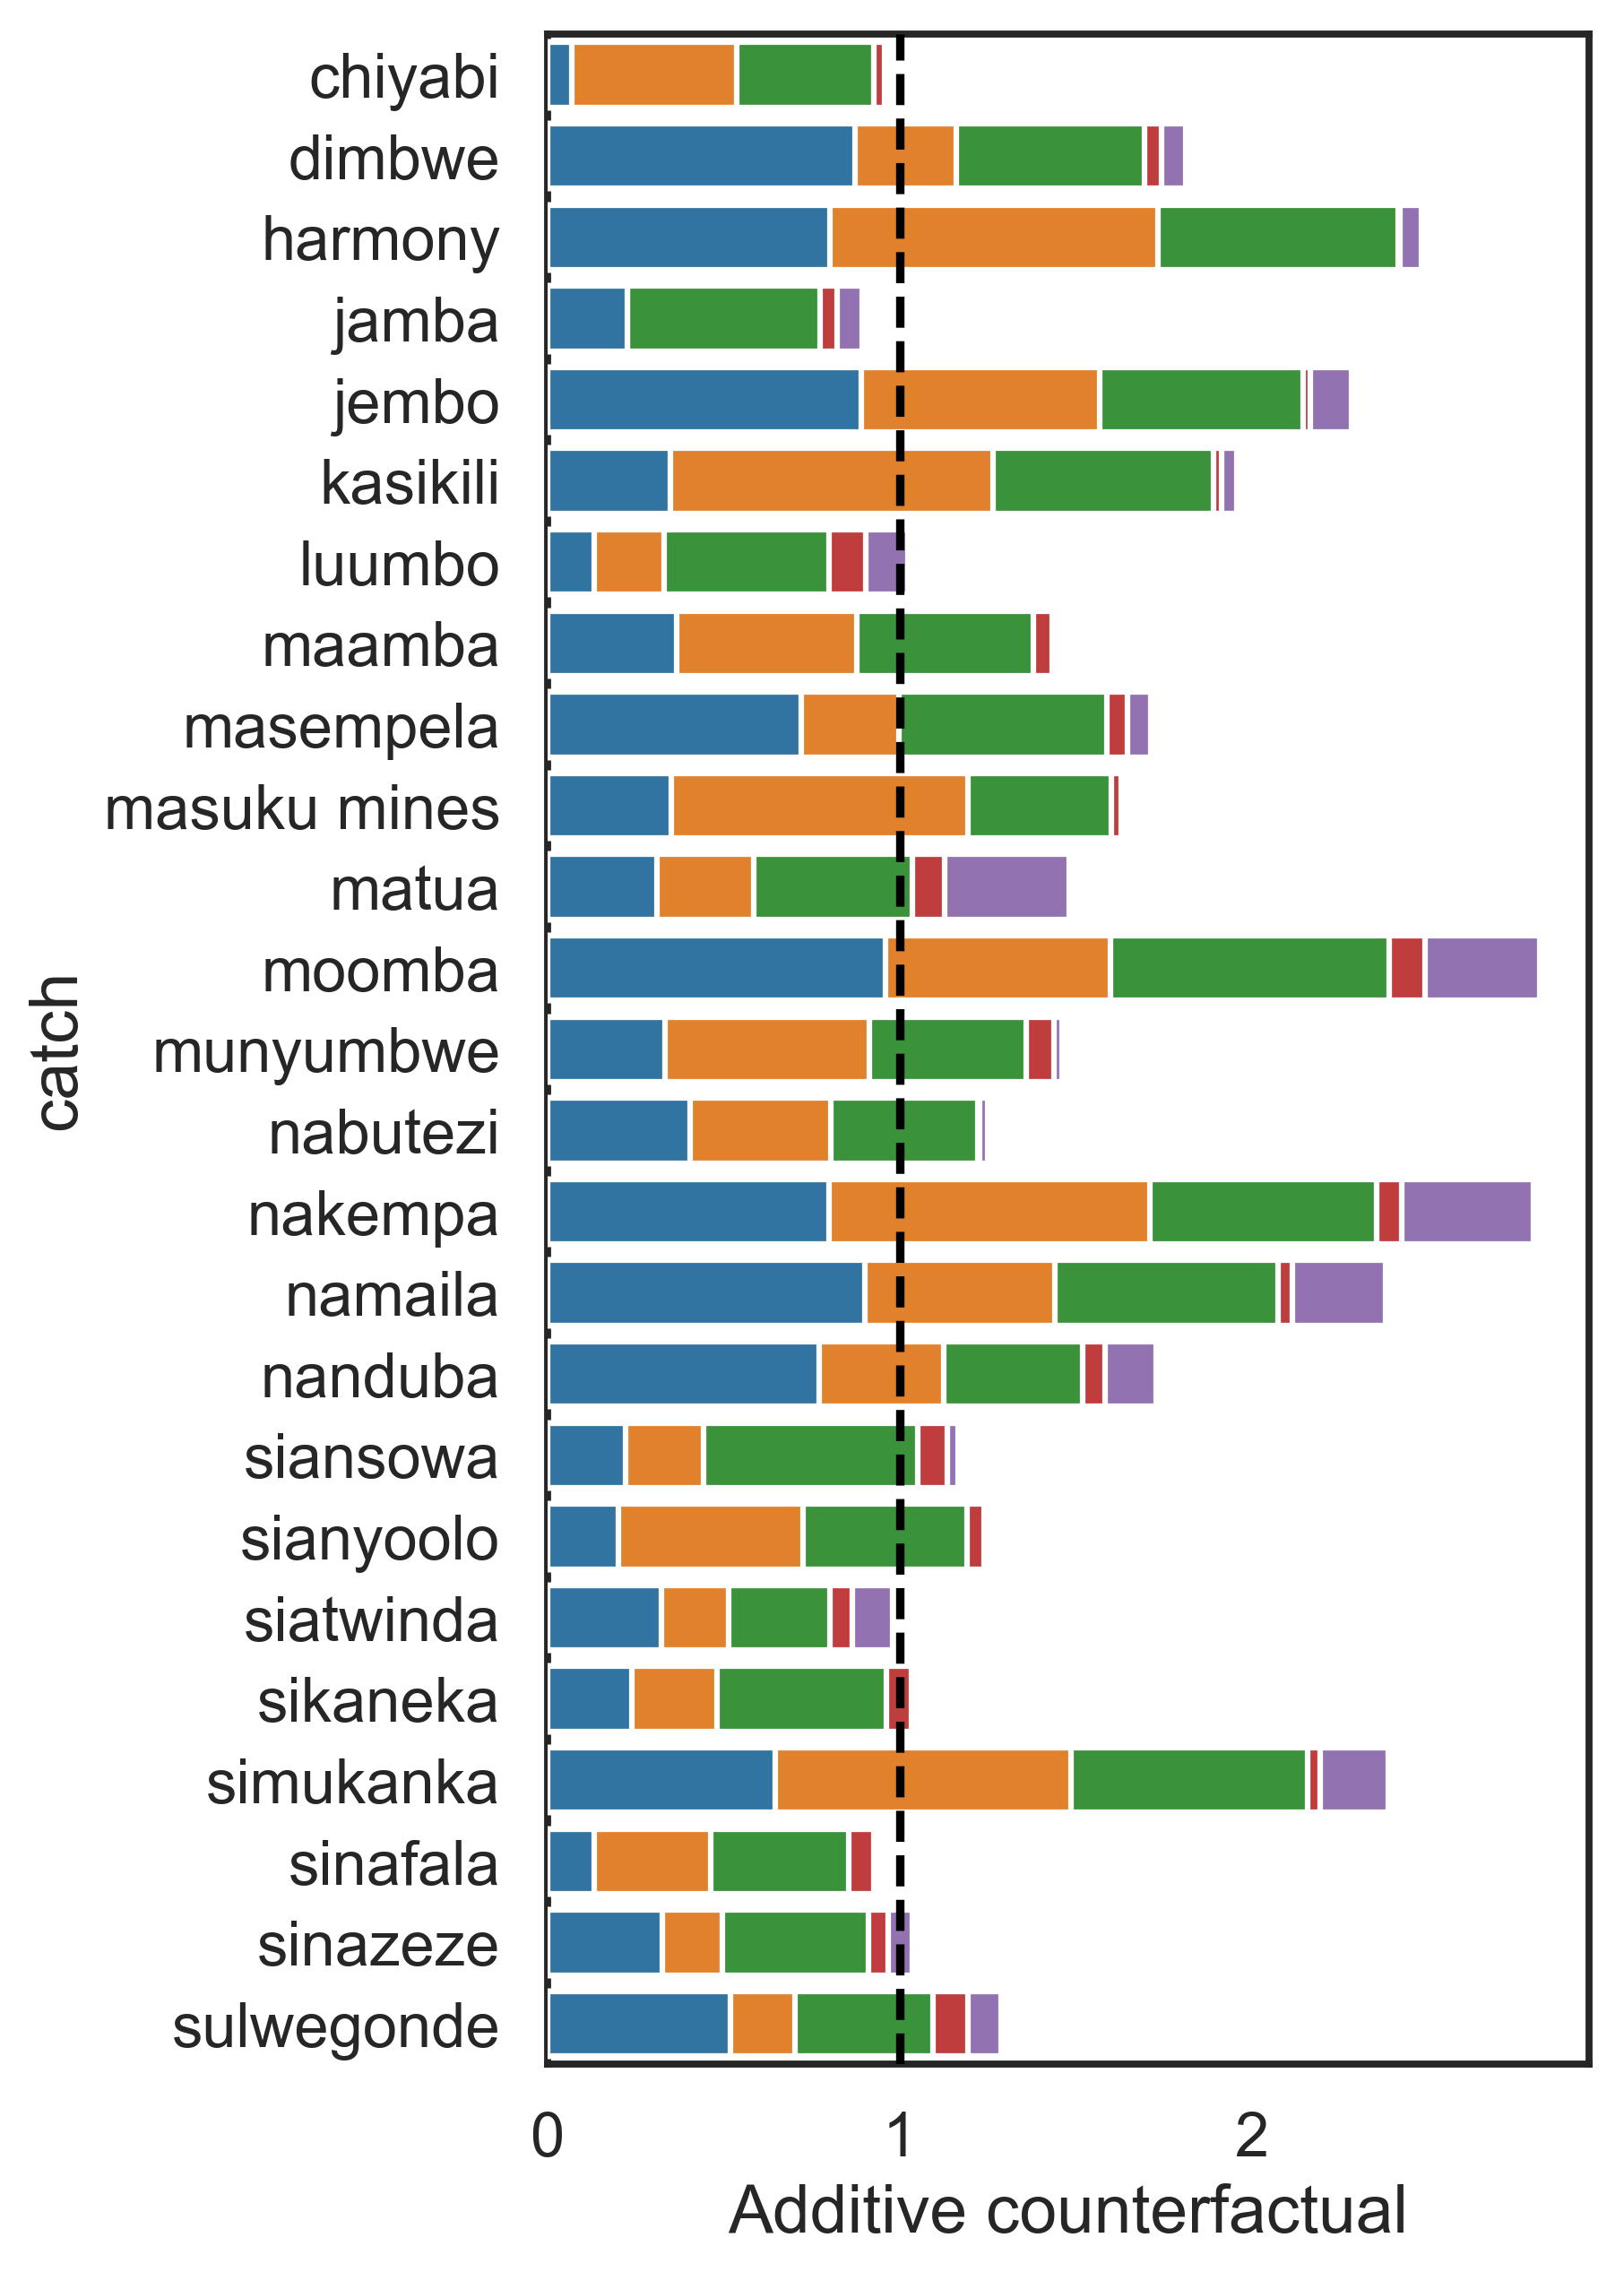

In [265]:


# Creating stacked bar chart, the terrible way:
# itn, irs, mda, chw_hs, chw_rcd
plt.figure(figsize=(5,10), dpi=300)
# sns.barplot(x="rel_d_EIR", y="catch", data=x,label="Total",color="C0")

# print(set(a_gr["EIR"]))
cfvl = ["rcd","chw_hs","mda","irs","itn_all_years"]
cfvl = cfvl[::-1]

for j in range(1,len(cfvl)+1):
    print(cfvl[:j])
    hold = a_gr[np.in1d(a_gr["cf_var"],cfvl[:j])]
    x = hold.groupby("catch").agg({"rel_d_EIR": "sum",
                                  "EIR": "median"}).reset_index()
    sns.barplot(x="rel_d_EIR", y="catch", data=x,label="Total",color="C{}".format(j-1),zorder=100-j)
    
plt.axvline(1,color='black', ls='dashed',zorder=100)
plt.xlabel("Additive counterfactual")

In [27]:
no_int1 = np.logical_and(np.logical_not(df["itn"]),
                       np.logical_not(df["irs"]))
no_int2 = np.logical_and(np.logical_not(df["mda"]),
                         np.logical_not(df["rcd"]))
no_int3 = np.logical_not(df["chw_hs"])

no_int = np.logical_and(np.logical_and(no_int1,no_int2),no_int3)
                        
df_no_int = df[no_int]
a = df_no_int.groupby('catch').agg("median")
a.reset_index(inplace=True)
a[["catch","EIR","RDT_prev","avg_RDT_prev","cases"]].to_csv("baseline_transmission_07-08.csv")

c:\users\jsuresh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0, 0.5, 'Change from previous baseline EIR')

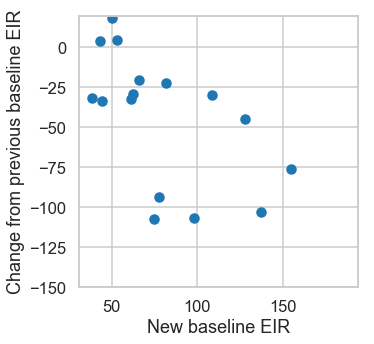

In [45]:
# Show how baseline transmissions have decreased with new ITN assumptions:
x0 = pd.read_csv("baseline_transmission.csv")
x1 = a[["catch","EIR","RDT_prev","avg_RDT_prev","cases"]]

x0.rename(columns={"historical_annual_EIR": "v0_EIR"}, inplace=True)
x1.rename(columns={"EIR": "v1_EIR"}, inplace=True)
c = x1.merge(x0,how="left",on="catch")

plt.figure(figsize=(5,5))
# plt.subplot(211)
plt.scatter(c["v1_EIR"],c["v1_EIR"]-c["v0_EIR"])
plt.ylim([-150,20])
plt.xlabel("New baseline EIR")
plt.ylabel("Change from previous baseline EIR")
# sns.swarmplot(y="v0_EIR", data=c)

In [ ]:
type_dict = {"moomba": "ITN alone",
            "nakemp"}